# K-means classifier

Basado en https://realpython.com/k-means-clustering-python/

## Prepare Data

In [395]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [396]:
features, true_labels = make_blobs(
    n_samples=500,
    centers=5,
    cluster_std=1.5,
    random_state = 42
)

In [397]:
features[:7]

array([[ 4.62150868,  0.62728813],
       [ 1.88769669,  6.32162738],
       [ 0.10184364,  5.47013755],
       [-0.22202217,  0.43658822],
       [-9.68581507, -7.40737982],
       [ 3.54432889,  2.29785757],
       [-5.1279541 , -6.49847833]])

In [398]:
true_labels[:30]

array([1, 4, 4, 1, 2, 1, 2, 4, 0, 0, 1, 1, 1, 4, 3, 3, 1, 3, 2, 1, 4, 3,
       2, 3, 0, 3, 0, 3, 2, 1])

En la figura se aprecian 4 grupos, aunque sabemos que se pidieron 5 grupos al hacer el dataset.

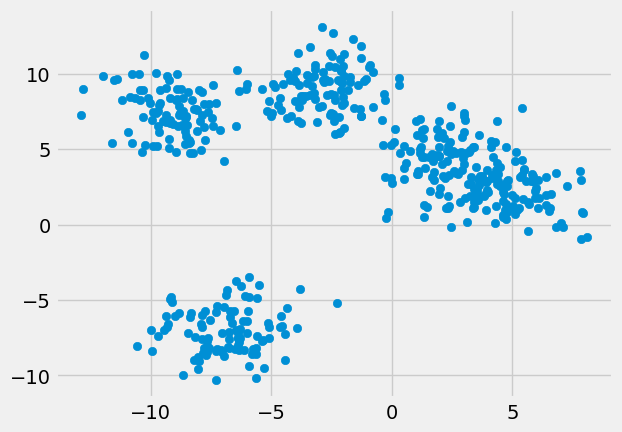

In [399]:
ft = features.T
plt.scatter(ft[0], ft[1])

En esta otra figura se aprecian los 5 grupos pedidos. Uno de los grupos está muy pegado a otro.

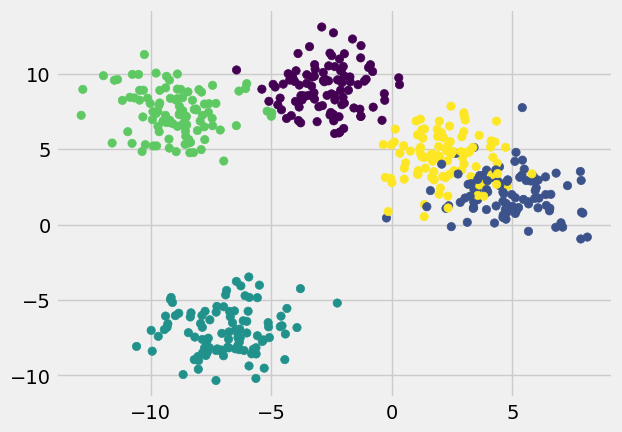

In [400]:
ft = features.T
plt.scatter(ft[0], ft[1], c = true_labels)

In [401]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [402]:
scaled_features[:5]

array([[ 1.27918545, -0.43467921],
       [ 0.7743718 ,  0.53907135],
       [ 0.44460406,  0.39346382],
       [ 0.38480043, -0.46728951],
       [-1.36274178, -1.8086336 ]])

## Create and fit model

In [403]:
kmeans = KMeans(
    n_clusters = 5, #5 clusters as we know there are 5 (usually we don't know)
    init="random", #initial number of centroids
    n_init=16, #times running with random seeds
    max_iter=300,
    random_state=42
)

In [404]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=5, n_init=16, random_state=42)

In [405]:
# The lowest Sum of squared distances of samples to their closest cluster center value
kmeans.inertia_

61.8097251020912

In [406]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-1.25761424,  0.72641533],
       [ 0.79439267,  0.24939001],
       [-0.84492533, -1.74794039],
       [ 1.31742599, -0.2034867 ],
       [-0.09249615,  0.99651898]])

In [407]:
# The number of iterations required to converge
kmeans.n_iter_

6

In [408]:
kmeans.labels_[:30] #predicted labels

array([3, 1, 1, 1, 2, 3, 2, 1, 4, 4, 3, 3, 3, 1, 0, 0, 3, 0, 2, 3, 1, 0,
       2, 0, 4, 0, 4, 0, 2, 3], dtype=int32)

In [409]:
true_labels[:30]

array([1, 4, 4, 1, 2, 1, 2, 4, 0, 0, 1, 1, 1, 4, 3, 3, 1, 3, 2, 1, 4, 3,
       2, 3, 0, 3, 0, 3, 2, 1])

En la siguiente imagen se aprecian las clases predichas por KMeans

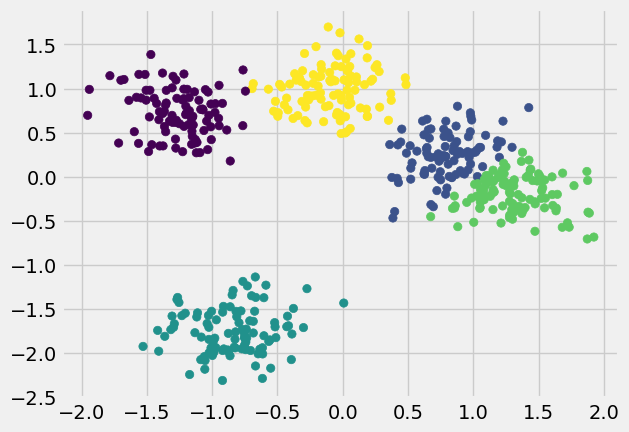

In [410]:
sc_t = scaled_features.T
plt.scatter(sc_t[0], sc_t[1], c = kmeans.labels_)

Y estas son las clases generadas automáticamente. Se parecen, pero no les asignó el mismo valor de la clase.

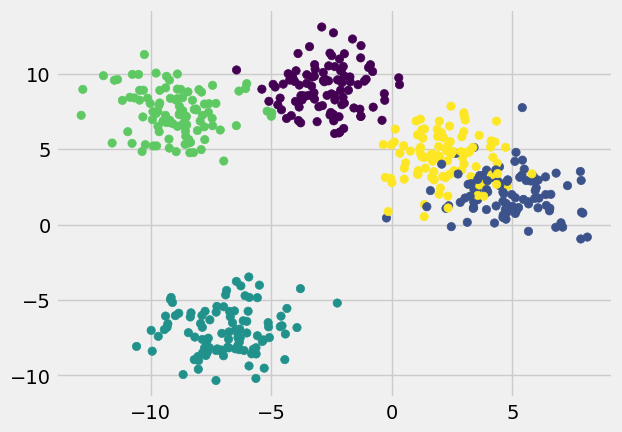

In [411]:
ft = features.T
plt.scatter(ft[0], ft[1], c = true_labels)

## Evaluación
Todo mal???

In [412]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

print(classification_report(true_labels,kmeans.labels_))

              precision    recall  f1-score   support

           0       0.01      0.01      0.01       100
           1       0.09      0.08      0.08       100
           2       1.00      1.00      1.00       100
           3       0.00      0.00      0.00       100
           4       0.00      0.00      0.00       100

    accuracy                           0.22       500
   macro avg       0.22      0.22      0.22       500
weighted avg       0.22      0.22      0.22       500



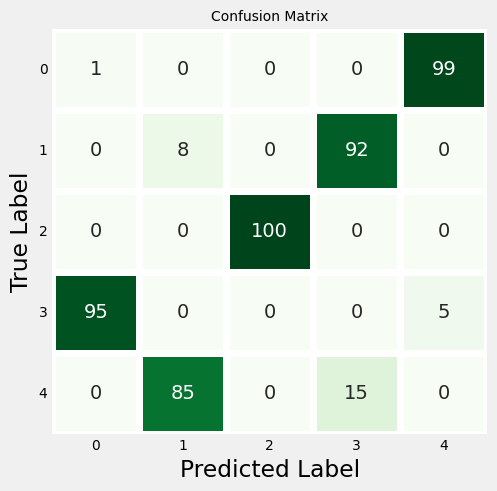

In [413]:
cm = confusion_matrix(true_labels, kmeans.labels_)

df1 = pd.DataFrame(columns=["0","1","2","3","4"], index= ["0","1","2","3","4"], data= cm )

f,ax = plt.subplots(figsize=(5,5))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 14})
plt.xlabel("Predicted Label")
plt.xticks(size = 10)
plt.yticks(size = 10, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 10)
plt.show()


## Choosing centrers


### Elbow method

In [414]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11): #vary number of clusters to find best number
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

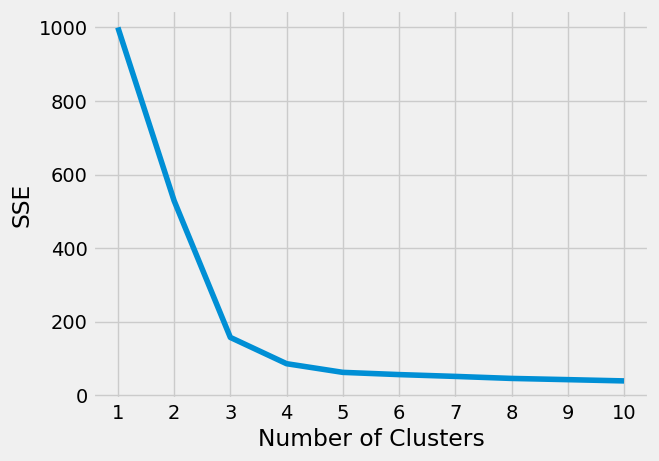

In [415]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

### Silhouette coefficient

In [416]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

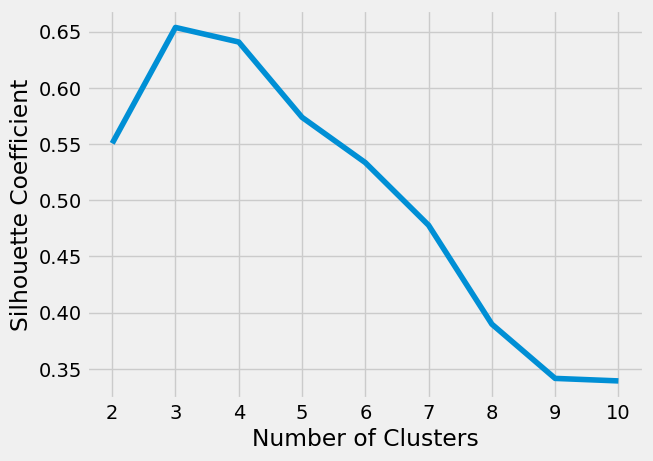

In [417]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

El número de K proporcionado por los métodos no siempre es el número real, depende de cómo se junten los datos originales y como "los vea" KMeans.